# EDA and Preprocessing - Bank Marketing Dataset

In [54]:
# importing required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


bank = pd.read_csv("D:\\Portfolio\\02_Bank_Marketing\\bank.csv")

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

# changing figure size

In [55]:
#shape of dataset
bank.shape

(11162, 17)

In [56]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [57]:
# display first 5 rows
bank.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [58]:
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


**Notes:**
1. info tells us that there are no null values in dataset
2. only 7 features are numerical
3. 10 fetaures are categorical

In [59]:
bank.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

In [60]:
# no null values
pd.isnull(bank).sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Preprocessing

In [61]:
# replacing yes and no from deposit column by 1 and 0 to convert categorical feature to numerical feature
bank['deposit'].replace(to_replace='yes', value=1, inplace=True)
bank['deposit'].replace(to_replace='no',  value=0, inplace=True)
bank['deposit'].head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [62]:
# replacing yes and no from loan column by 1 and 0 to convert categorical feature to numerical feature
bank['loan'].replace(to_replace='no', value=1, inplace=True)
bank['loan'].replace(to_replace='yes',  value=0, inplace=True)
bank.head()

age         job  marital  education default  balance housing  loan  \
0   59      admin.  married  secondary      no     2343     yes     1   
1   56      admin.  married  secondary      no       45      no     1   
2   41  technician  married  secondary      no     1270     yes     1   
3   55    services  married  secondary      no     2476     yes     1   
4   54      admin.  married   tertiary      no      184      no     1   

   contact  day month  duration  campaign  pdays  previous poutcome  deposit  
0  unknown    5   may      1042         1     -1         0  unknown        1  
1  unknown    5   may      1467         1     -1         0  unknown        1  
2  unknown    5   may      1389         1     -1         0  unknown        1  
3  unknown    5   may       579         1     -1         0  unknown        1  
4  unknown    5   may       673         2     -1         0  unknown        1

In [63]:
# replacing yes and no from default column by 1 and 0 to convert categorical feature to numerical feature
bank['default'].replace(to_replace='no', value=1, inplace=True)
bank['default'].replace(to_replace='yes',  value=0, inplace=True)
bank.head()

age         job  marital  education  default  balance housing  loan  \
0   59      admin.  married  secondary        1     2343     yes     1   
1   56      admin.  married  secondary        1       45      no     1   
2   41  technician  married  secondary        1     1270     yes     1   
3   55    services  married  secondary        1     2476     yes     1   
4   54      admin.  married   tertiary        1      184      no     1   

   contact  day month  duration  campaign  pdays  previous poutcome  deposit  
0  unknown    5   may      1042         1     -1         0  unknown        1  
1  unknown    5   may      1467         1     -1         0  unknown        1  
2  unknown    5   may      1389         1     -1         0  unknown        1  
3  unknown    5   may       579         1     -1         0  unknown        1  
4  unknown    5   may       673         2     -1         0  unknown        1

In [64]:
bank["loan"].value_counts()

1    9702
0    1460
Name: loan, dtype: int64

In [65]:
# replacing yes and no from housing column by 1 and 0 to convert categorical feature to numerical feature
bank['housing'].replace(to_replace='no', value=1, inplace=True)
bank['housing'].replace(to_replace='yes',  value=0, inplace=True)
bank.head()

age         job  marital  education  default  balance  housing  loan  \
0   59      admin.  married  secondary        1     2343        0     1   
1   56      admin.  married  secondary        1       45        1     1   
2   41  technician  married  secondary        1     1270        0     1   
3   55    services  married  secondary        1     2476        0     1   
4   54      admin.  married   tertiary        1      184        1     1   

   contact  day month  duration  campaign  pdays  previous poutcome  deposit  
0  unknown    5   may      1042         1     -1         0  unknown        1  
1  unknown    5   may      1467         1     -1         0  unknown        1  
2  unknown    5   may      1389         1     -1         0  unknown        1  
3  unknown    5   may       579         1     -1         0  unknown        1  
4  unknown    5   may       673         2     -1         0  unknown        1

In [73]:
# one hot encoding for marital feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['marital'])
bank = bank.drop('marital',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('divorced',axis = 1)
bank.head()

age  default  balance  housing  loan  day month  duration  campaign  pdays  \
0   59        1     2343        0     1    5   may      1042         1     -1   
1   56        1       45        1     1    5   may      1467         1     -1   
2   41        1     1270        0     1    5   may      1389         1     -1   
3   55        1     2476        0     1    5   may       579         1     -1   
4   54        1      184        1     1    5   may       673         2     -1   

   ...  student  technician  unemployed  cellular  telephone  failure  \
0  ...        0           0           0         0          0        0   
1  ...        0           0           0         0          0        0   
2  ...        0           1           0         0          0        0   
3  ...        0           0           0         0          0        0   
4  ...        0           0           0         0          0        0   

   success  unknown  married  single  
0        0        1        1       0  
1        0        1        1       0  
2        0        1        1       0  
3        0        1        1       0  
4        0        1        1       0  

[5 rows x 33 columns]

In [66]:
# one hot encoding for education feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['education'])
bank = bank.drop('education',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('unknown',axis = 1)
bank.head()

age         job  marital  default  balance  housing  loan  contact  day  \
0   59      admin.  married        1     2343        0     1  unknown    5   
1   56      admin.  married        1       45        1     1  unknown    5   
2   41  technician  married        1     1270        0     1  unknown    5   
3   55    services  married        1     2476        0     1  unknown    5   
4   54      admin.  married        1      184        1     1  unknown    5   

  month  duration  campaign  pdays  previous poutcome  deposit  primary  \
0   may      1042         1     -1         0  unknown        1        0   
1   may      1467         1     -1         0  unknown        1        0   
2   may      1389         1     -1         0  unknown        1        0   
3   may       579         1     -1         0  unknown        1        0   
4   may       673         2     -1         0  unknown        1        0   

   secondary  tertiary  
0          1         0  
1          1         0  
2          1         0  
3          1         0  
4          0         1

In [67]:
one_hot = pd.get_dummies(bank['job'])
bank = bank.drop('job',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('unknown',axis = 1)
bank.head()

age  marital  default  balance  housing  loan  contact  day month  \
0   59  married        1     2343        0     1  unknown    5   may   
1   56  married        1       45        1     1  unknown    5   may   
2   41  married        1     1270        0     1  unknown    5   may   
3   55  married        1     2476        0     1  unknown    5   may   
4   54  married        1      184        1     1  unknown    5   may   

   duration  ...  blue-collar  entrepreneur  housemaid management  retired  \
0      1042  ...            0             0          0          0        0   
1      1467  ...            0             0          0          0        0   
2      1389  ...            0             0          0          0        0   
3       579  ...            0             0          0          0        0   
4       673  ...            0             0          0          0        0   

   self-employed  services  student  technician  unemployed  
0              0         0        0           0           0  
1              0         0        0           0           0  
2              0         0        0           1           0  
3              0         1        0           0           0  
4              0         0        0           0           0  

[5 rows x 29 columns]

In [68]:
# one hot encoding for contact feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['contact'])
bank = bank.drop('contact',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('unknown',axis = 1)
bank.head()

age  marital  default  balance  housing  loan  day month  duration  \
0   59  married        1     2343        0     1    5   may      1042   
1   56  married        1       45        1     1    5   may      1467   
2   41  married        1     1270        0     1    5   may      1389   
3   55  married        1     2476        0     1    5   may       579   
4   54  married        1      184        1     1    5   may       673   

   campaign  ...  housemaid  management retired  self-employed  services  \
0         1  ...          0           0       0              0         0   
1         1  ...          0           0       0              0         0   
2         1  ...          0           0       0              0         0   
3         1  ...          0           0       0              0         1   
4         2  ...          0           0       0              0         0   

   student  technician  unemployed  cellular  telephone  
0        0           0           0         0          0  
1        0           0           0         0          0  
2        0           1           0         0          0  
3        0           0           0         0          0  
4        0           0           0         0          0  

[5 rows x 30 columns]

In [74]:
# one hot encoding for month feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['month'])
bank = bank.drop('month',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('dec',axis = 1)
bank.head()

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   59        1     2343        0     1    5      1042         1     -1   
1   56        1       45        1     1    5      1467         1     -1   
2   41        1     1270        0     1    5      1389         1     -1   
3   55        1     2476        0     1    5       579         1     -1   
4   54        1      184        1     1    5       673         2     -1   

   previous  ...  aug  feb  jan  jul  jun  mar  may  nov  oct  sep  
0         0  ...    0    0    0    0    0    0    1    0    0    0  
1         0  ...    0    0    0    0    0    0    1    0    0    0  
2         0  ...    0    0    0    0    0    0    1    0    0    0  
3         0  ...    0    0    0    0    0    0    1    0    0    0  
4         0  ...    0    0    0    0    0    0    1    0    0    0  

[5 rows x 43 columns]

In [69]:
# one hot encoding for poutcome feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['poutcome'])
bank = bank.drop('poutcome',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('other',axis = 1)
bank.head()

age  marital  default  balance  housing  loan  day month  duration  \
0   59  married        1     2343        0     1    5   may      1042   
1   56  married        1       45        1     1    5   may      1467   
2   41  married        1     1270        0     1    5   may      1389   
3   55  married        1     2476        0     1    5   may       579   
4   54  married        1      184        1     1    5   may       673   

   campaign  ...  self-employed  services  student  technician  unemployed  \
0         1  ...              0         0        0           0           0   
1         1  ...              0         0        0           0           0   
2         1  ...              0         0        0           1           0   
3         1  ...              0         1        0           0           0   
4         2  ...              0         0        0           0           0   

   cellular  telephone  failure  success  unknown  
0         0          0        0        0        1  
1         0          0        0        0        1  
2         0          0        0        0        1  
3         0          0        0        0        1  
4         0          0        0        0        1  

[5 rows x 32 columns]

In [75]:
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            11162 non-null  int64
 1   default        11162 non-null  int64
 2   balance        11162 non-null  int64
 3   housing        11162 non-null  int64
 4   loan           11162 non-null  int64
 5   day            11162 non-null  int64
 6   duration       11162 non-null  int64
 7   campaign       11162 non-null  int64
 8   pdays          11162 non-null  int64
 9   previous       11162 non-null  int64
 10  deposit        11162 non-null  int64
 11  primary        11162 non-null  uint8
 12  secondary      11162 non-null  uint8
 13  tertiary       11162 non-null  uint8
 14  admin.         11162 non-null  uint8
 15  blue-collar    11162 non-null  uint8
 16  entrepreneur   11162 non-null  uint8
 17  housemaid      11162 non-null  uint8
 18  management     11162 non-null  uint8
 19  reti

In [76]:
bank.head()

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   59        1     2343        0     1    5      1042         1     -1   
1   56        1       45        1     1    5      1467         1     -1   
2   41        1     1270        0     1    5      1389         1     -1   
3   55        1     2476        0     1    5       579         1     -1   
4   54        1      184        1     1    5       673         2     -1   

   previous  ...  aug  feb  jan  jul  jun  mar  may  nov  oct  sep  
0         0  ...    0    0    0    0    0    0    1    0    0    0  
1         0  ...    0    0    0    0    0    0    1    0    0    0  
2         0  ...    0    0    0    0    0    0    1    0    0    0  
3         0  ...    0    0    0    0    0    0    1    0    0    0  
4         0  ...    0    0    0    0    0    0    1    0    0    0  

[5 rows x 43 columns]

In [78]:
# store preprocessed data in csv
bank.to_csv("PreprocessedBank.csv")

**NOTE**
All Features are converted to numerical

# Checking multicolinarity

In [79]:
X = bank.drop(columns=['deposit'])
y = bank.iloc[:,-1]

In [80]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((7813, 42), (3349, 42))

In [81]:
X_train.corr()

age   default   balance   housing      loan       day  \
age            1.000000  0.012825  0.099763  0.168035  0.024293  0.003938   
default        0.012825  1.000000  0.065304  0.013734  0.068690 -0.027595   
balance        0.099763  0.065304  1.000000  0.082251  0.088383  0.019602   
housing        0.168035  0.013734  0.082251  1.000000  0.095446  0.012390   
loan           0.024293  0.068690  0.088383  0.095446  1.000000 -0.011518   
day            0.003938 -0.027595  0.019602  0.012390 -0.011518  1.000000   
duration       0.004311  0.005718  0.024791 -0.034261  0.004013 -0.024648   
campaign       0.001411 -0.026194 -0.010505 -0.004031 -0.034042  0.141878   
pdays          0.008268  0.038698  0.011394 -0.054735  0.029096 -0.076872   
previous       0.010338  0.035527  0.023118  0.003552  0.024647 -0.064136   
primary        0.231202 -0.021585  0.005372 -0.016276 -0.023260 -0.000626   
secondary     -0.092067  0.006233 -0.081028 -0.121208 -0.073273 -0.007438   
tertiary      -0.102468  0.008058  0.074083  0.119058  0.069570  0.004797   
admin.        -0.054690  0.023641 -0.043811 -0.065525 -0.041258 -0.011069   
blue-collar   -0.063423 -0.017438 -0.040980 -0.190981 -0.057840 -0.021423   
entrepreneur   0.022291 -0.026606  0.022448 -0.007571 -0.037824 -0.009720   
housemaid      0.081908 -0.014921 -0.009539  0.051580  0.020298  0.017599   
management    -0.052617 -0.003656  0.044250  0.067977  0.050398  0.010924   
retired        0.555153  0.017619  0.057148  0.168698  0.044520 -0.003324   
self-employed -0.020221  0.001683  0.028365  0.024324 -0.000617  0.001829   
services      -0.068529  0.022884 -0.042092 -0.090184 -0.036546  0.005190   
student       -0.232025  0.016618 -0.005207  0.123286  0.070172 -0.022974   
technician    -0.087555 -0.008888  0.008345 -0.008343 -0.014089  0.026883   
unemployed    -0.006973 -0.024741 -0.016026  0.065782  0.042395 -0.002517   
cellular      -0.083592  0.031167  0.034622  0.182148  0.012359 -0.020697   
telephone      0.202704  0.017905  0.041899  0.083166  0.015710  0.030784   
failure       -0.005149  0.023504 -0.001231 -0.081901 -0.012020 -0.071270   
success        0.070414  0.041028  0.046317  0.140766  0.082810 -0.040880   
unknown       -0.031084 -0.056400 -0.038035 -0.032590 -0.060321  0.082912   
married        0.305766  0.012584  0.021544 -0.039277 -0.048634  0.005806   
single        -0.462704  0.001772 -0.010005  0.043897  0.072305 -0.007664   
apr           -0.023341  0.019314  0.012107 -0.027428  0.041898  0.109718   
aug            0.046327  0.008019  0.016646  0.225490  0.063835 -0.011133   
feb            0.026453  0.025579  0.003441  0.076260  0.002988 -0.228721   
jan            0.021840 -0.003182 -0.014489  0.082014 -0.000561  0.201608   
jul           -0.011779 -0.048437 -0.055118  0.015503 -0.165001  0.136816   
jun            0.006891 -0.019441 -0.001665  0.082789  0.023450 -0.182135   
mar            0.030045  0.020191  0.033283  0.090423  0.041121 -0.049799   
may           -0.113797 -0.001558 -0.066828 -0.420080 -0.014849 -0.008394   
nov            0.021165 -0.007160  0.094690 -0.010289 -0.003951  0.053983   
oct            0.066242  0.024345  0.026652  0.097573  0.031272  0.089718   
sep            0.033474  0.014452  0.014924  0.084701  0.041517 -0.071719   

               duration  campaign     pdays  previous  ...       aug  \
age            0.004311  0.001411  0.008268  0.010338  ...  0.046327   
default        0.005718 -0.026194  0.038698  0.035527  ...  0.008019   
balance        0.024791 -0.010505  0.011394  0.023118  ...  0.016646   
housing       -0.034261 -0.004031 -0.054735  0.003552  ...  0.225490   
loan           0.004013 -0.034042  0.029096  0.024647  ...  0.063835   
day           -0.024648  0.141878 -0.076872 -0.064136  ... -0.011133   
duration       1.000000 -0.041768 -0.030398 -0.021265  ... -0.013657   
campaign      -0.041768  1.000000 -0.104761 -0.049887  ...  0.156099   
pdays         -0.030398 -0.104761  1.000000  0.504476  ... -

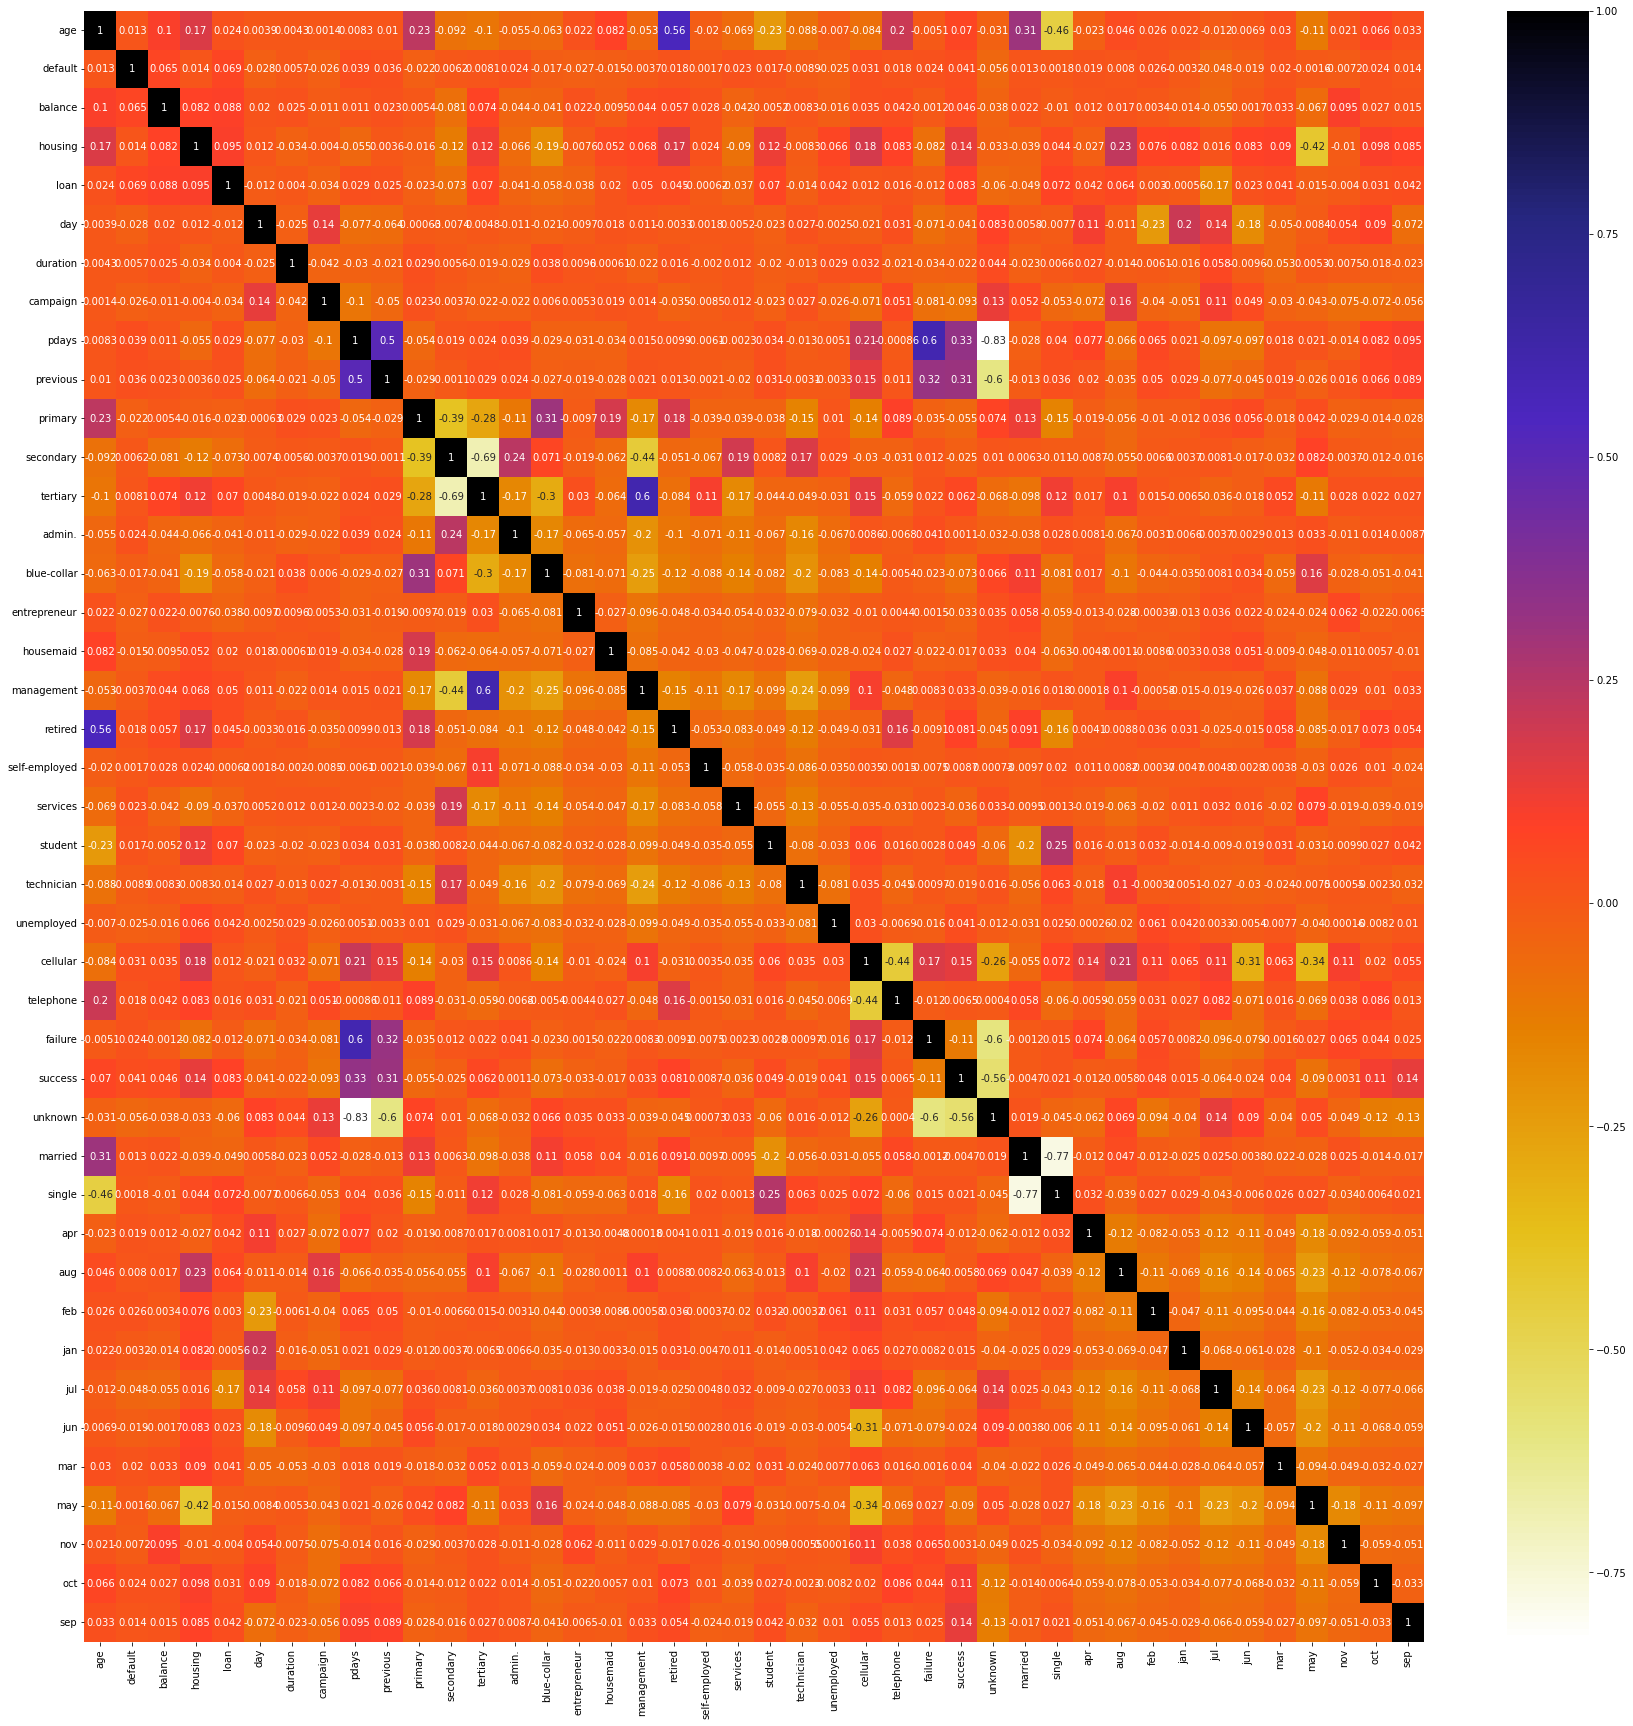

In [82]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [83]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [84]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

2

# Correlation with Class variable 'deposit'

In [87]:
CorrBank=bank.drop("deposit", axis=1).apply(lambda x: x.corr(bank.deposit))

In [88]:
# puttinh in descending order
Corr2=CorrBank.sort_values(ascending=False)

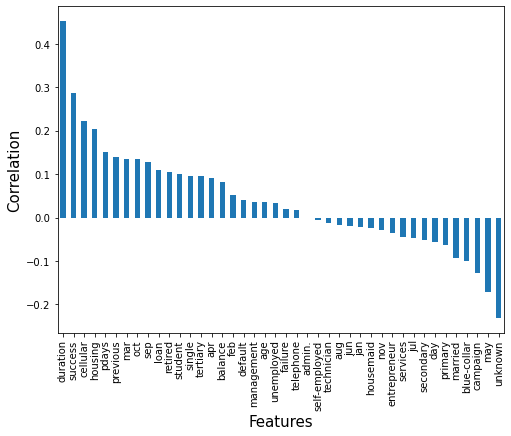

In [89]:

Corr2.plot.bar()
plt.xlabel("Features", fontsize=15)
plt.ylabel("Correlation", fontsize=15)


plt.show()

**Notes : **
1. As can be seen from the plot duration is a very important feature. This is the duration of last call with client. 
2. If the call duration is more , there are higher chances of getting a yes from the client. 
3. It has been sorted in descending order.
4. Succes , cellular, housing, unknown, campaign are also highly correlated